In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
print("Category in 'gender' variable: ",end=" ")
print(df["gender"].unique())

print("Category in 'race/ethnicity' variable: ",end=" ")
print(df["race/ethnicity"].unique())

print("Category in 'parental level of education' variable: ",end=" ")
print(df["parental level of education"].unique())

print("Category in 'lunch' variable: ",end=" ")
print(df["lunch"].unique())

print("Category in 'test preparation course' variable: ",end=" ")
print(df["test preparation course"].unique())

Category in 'gender' variable:  ['female' 'male']
Category in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Category in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in 'lunch' variable:  ['standard' 'free/reduced']
Category in 'test preparation course' variable:  ['none' 'completed']


In [15]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"]
cat_features = [feature for feature in df.columns if df[feature].dtype == "object"]

print(f"{len(numeric_features)} numerical features : {numeric_features}")
print(f"{len(cat_features)} categorical features : {cat_features}")

3 numerical features : ['math score', 'reading score', 'writing score']
5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df["reading score"] == 100]["average"].count()
writing_full = df[df["writing score"] == 100]["average"].count()
math_full = df[df["math score"] == 100]["average"].count()

print(f"# Stud with full mark in Math: {math_full}")
print(f"# Stud with full mark in Reading: {reading_full}")
print(f"# Stud with full mark in Writing: {writing_full}")

# Stud with full mark in Math: 7
# Stud with full mark in Reading: 17
# Stud with full mark in Writing: 14


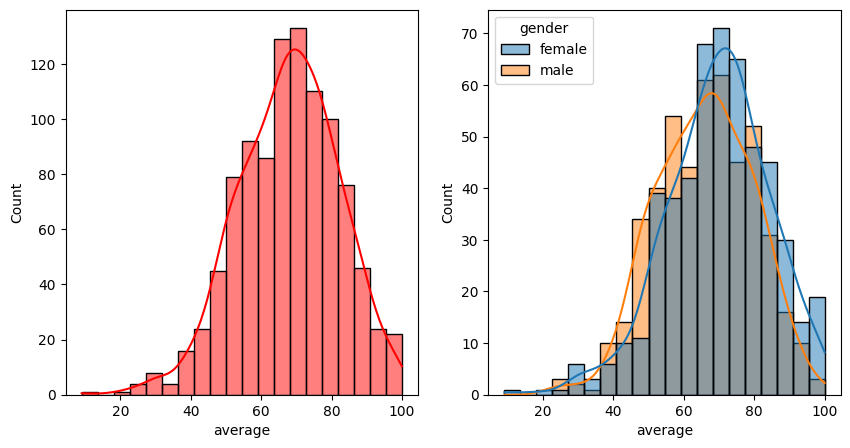

In [27]:
fig,axs = plt.subplots(1,2,figsize = (10,5))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=20,kde=True,color="r")
plt.subplot(122)
sns.histplot(data=df,x="average",bins=20,kde=True,hue="gender")
plt.show()